In [1]:
# loading a dataset from pytorch
import torch
from torch.utils.data import Dataset
from torchvision import datasets
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms.functional
from torch import nn

transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
])

# simply call dataset
train_data = datasets.MNIST(
    root='data',
    train=True,
    download=True,
    transform=transform
)
test_data = datasets.MNIST(
    root = 'data',
    train=False,
    download=True,
    transform=transform
)

print(len(train_data))
# B, Type, Tensor

60000


In [ ]:
'''Custom Dataset

1. Provide length and get_item, so torch can get batches,
and we can access it like a normal dataset

2. Init function, where we intialize the folder with the 
labels and their connected images


'''

torch.Size([28, 28])


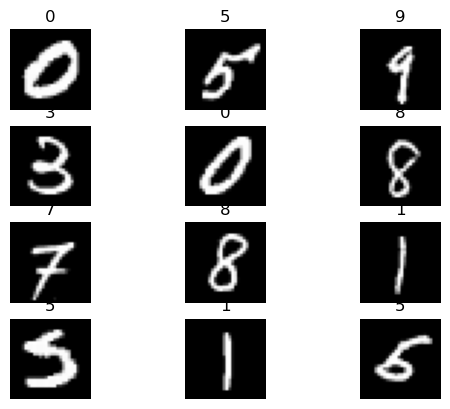

In [2]:
# visualizing data
t = train_data[3000][0].squeeze()
fig,axes = plt.subplots(4,3)




for i in range(12):
    ind = torch.randint(low=0,high=len(train_data),size=(1,)).item()
    img,label = train_data[ind]
    axes[i // 3][i % 3].imshow(img.squeeze(),cmap='grey')
    axes[i // 3][i % 3].axis("off")
    axes[i // 3][i % 3].set_title(label)


print(t.shape)
    
    


In [9]:
'''Training a neural net.

Now, we can use the useful batch function to train
our neural network to classify digits!
'''
from torch.utils.data import DataLoader
device = 'cuda'

# simple convolutional neural network
class CNN(nn.Module):
    def __init__(self,channels,im_dims,n_labels,hidden_size=200,device=device):
        super().__init__()
        # define channels, do conv net
        # accordingly
        self.layers = nn.ModuleList()
        
        for i in range(len(channels)-1):
            self.layers.append(nn.Conv2d(channels[i],channels[i+1],kernel_size=3,padding=1,device=device))
            self.layers.append(nn.ReLU())
        
        self.final_conv = nn.Conv2d(channels[-1],channels[0],kernel_size=1,padding=0)
        
        self.mlp = nn.Sequential(
            nn.Linear(im_dims[0]*im_dims[1]*channels[0],hidden_size,device=device),
            nn.GELU(approximate='tanh'),
            nn.Linear(hidden_size,n_labels,device=device)
        )
        
    def forward(self,x):
        
        for layer in self.layers:
            x = layer(x)
        x = self.final_conv(x)
        # B, C, H, W -> B,C*H*W
        x = x.view(x.shape[0],-1)
        x = self.mlp(x)
        
        # softmax
        # B,labels
        x = nn.functional.softmax(x,dim=-1)
        return x
    
    
model = CNN([1,3,6,3],[28,28],10)
model.to(device)
model.train()

# loss criterion, dataloader, optimizer
train_loader = DataLoader(train_data,32)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=3e-4)
epochs = 3


In [ ]:
for i in range(epochs):
    print("Epoch:",i)
    running_loss = 0
    for batch in train_loader:
        # batch is image and label
        img,label = batch
        img,label = img.to(device),label.to(device)
        output = model(img)
        
        
        loss = criterion(output,label)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss
    print("Epoch-Loss:",running_loss)
    
    

Epoch: 0
Epoch-Loss: tensor(3339.0847, device='cuda:0', grad_fn=<AddBackward0>)
Epoch: 1
Epoch-Loss: tensor(2953.2205, device='cuda:0', grad_fn=<AddBackward0>)
Epoch: 2
Epoch-Loss: tensor(2903.3533, device='cuda:0', grad_fn=<AddBackward0>)


In [ ]:
# testing model output
# visualizing data
t = train_data[3000][0].squeeze()




for i in range(12):
    ind = torch.randint(low=0,high=len(test_data),size=(1,)).item()
    img,label = test_data[ind]
    print("Model-Assigned: ",model(img.to(device))[0][label])
    
    
# we have a model that can classify digits now.

Model-Assigned:  tensor(1.0000, device='cuda:0', grad_fn=<SelectBackward0>)
Model-Assigned:  tensor(1., device='cuda:0', grad_fn=<SelectBackward0>)
Model-Assigned:  tensor(0.0020, device='cuda:0', grad_fn=<SelectBackward0>)
Model-Assigned:  tensor(1., device='cuda:0', grad_fn=<SelectBackward0>)
Model-Assigned:  tensor(1., device='cuda:0', grad_fn=<SelectBackward0>)
Model-Assigned:  tensor(1., device='cuda:0', grad_fn=<SelectBackward0>)
Model-Assigned:  tensor(0.9997, device='cuda:0', grad_fn=<SelectBackward0>)
Model-Assigned:  tensor(0.0636, device='cuda:0', grad_fn=<SelectBackward0>)
Model-Assigned:  tensor(1., device='cuda:0', grad_fn=<SelectBackward0>)
Model-Assigned:  tensor(4.4178e-09, device='cuda:0', grad_fn=<SelectBackward0>)
Model-Assigned:  tensor(1., device='cuda:0', grad_fn=<SelectBackward0>)
Model-Assigned:  tensor(0.9999, device='cuda:0', grad_fn=<SelectBackward0>)
